<a href="https://colab.research.google.com/github/tohver/Deep-Learning/blob/master/fastai_04_SGD_etc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# the trick with the distance:
  # rmseDistance(x,mean3) < rmseDistance(x,mean7)

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap = "Greys")

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [6]:
path

Path('.')

In [7]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [8]:
(path/'valid').ls()

(#2) [Path('valid/7'),Path('valid/3')]

In [9]:
(path/'valid/3').ls().sorted()

(#1010) [Path('valid/3/1020.png'),Path('valid/3/1028.png'),Path('valid/3/1042.png'),Path('valid/3/1062.png'),Path('valid/3/1066.png'),Path('valid/3/1067.png'),Path('valid/3/1069.png'),Path('valid/3/1072.png'),Path('valid/3/1092.png'),Path('valid/3/1095.png')...]

In [10]:
(path/"valid/7").ls()

(#1028) [Path('valid/7/7648.png'),Path('valid/7/220.png'),Path('valid/7/1363.png'),Path('valid/7/1359.png'),Path('valid/7/411.png'),Path('valid/7/6731.png'),Path('valid/7/9169.png'),Path('valid/7/2480.png'),Path('valid/7/9864.png'),Path('valid/7/3573.png')...]

In [11]:
threes = (path/'train/7').ls()
image_path = threes[27]
img = Image.open(image_path)
img

In [12]:
image_path

Path('train/7/4173.png')

`Image` class from Python Imaging Library (PIL)

In [13]:
array(img)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [14]:
# color it in pandas

imgTensor = tensor(img)
df = pd.DataFrame(imgTensor)
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,59,90,156,120,0,0,0,0,0
9,0,0,0,0,0,0,11,58,216,161,7,20,96,119,126,215,215,215,255,254,254,254,246,0,0,0,0,0


In [15]:
np.average(df)

30.409438775510203

In [16]:
sevens = (path/'train/7').ls()
threes = (path/'train/3').ls()


In [17]:
??tensor

In [18]:
a = array([2,3,4,5])
a

array([2, 3, 4, 5])

In [19]:
b = torch.tensor(a)
b

tensor([2, 3, 4, 5])

## stack the matrices to tensors

In [20]:
tensor7 = [tensor(Image.open(x)) for x in sevens]
tensor3 = [tensor(Image.open(x)) for x in threes]
len(tensor3), len(tensor7)

(6131, 6265)

In [21]:
tensor3[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  31, 105, 105, 105, 219, 253, 255, 253, 253, 182,  

In [22]:
??show_image()

In [23]:
a = [1,2,3]
isinstance(a, np.ndarray), isinstance(a, list)

(False, True)

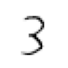

In [24]:
show_image(tensor3[444])

In [25]:
# stack all tensors to one 3-tensor
# we cast the integer to float: to let pytorch take the mean 
stacked3s = torch.stack(tensor3).float()/255
stacked7s = torch.stack(tensor7).float()/255

In [26]:
stacked3s[:3]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [27]:
stacked7s.shape

torch.Size([6265, 28, 28])

### Calculate the rank

In [28]:
print(f'This tensor hast rank {len(stacked7s.shape)}')
print(f'This tensor hast rank {stacked7s.ndim}')

This tensor hast rank 3
This tensor hast rank 3


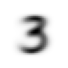

In [29]:
# calculate the average pixel value (= along axis 0 (6265 images))
mean3 = stacked3s.mean(0)
show_image(mean3)

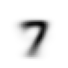

In [30]:
mean7 = stacked7s.mean(0)
show_image(mean7)

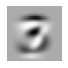

In [31]:
difference = mean3 - mean7
show_image(difference)

In [32]:
difference[difference<0]

tensor([-2.1203e-04, -1.0641e-05, -2.9420e-05, -9.9475e-05, -2.8089e-03, -6.6110e-04, -4.6966e-03, -1.1866e-02, -3.7063e-03, -7.2986e-04, -1.1956e-04, -1.6166e-03, -1.0874e-02, -2.1558e-02,
        -2.9754e-02, -5.3853e-02, -7.7437e-02, -1.1652e-01, -1.6064e-01, -2.1407e-01, -2.7410e-01, -3.3231e-01, -3.7583e-01, -3.8262e-01, -3.5031e-01, -2.7354e-01, -1.9308e-01, -1.4377e-01,
        -1.2348e-01, -1.1035e-01, -8.8944e-02, -6.9270e-02, -4.8726e-02, -2.9187e-02, -8.6830e-03, -1.1380e-03, -1.8278e-04, -2.6668e-03, -1.7558e-02, -4.1259e-02, -7.2343e-02, -1.2476e-01,
        -1.8860e-01, -2.7619e-01, -3.6924e-01, -4.5651e-01, -5.2007e-01, -5.5673e-01, -5.5075e-01, -4.9886e-01, -4.0517e-01, -2.8861e-01, -2.0962e-01, -1.9374e-01, -2.2337e-01, -2.3544e-01,
        -1.9325e-01, -1.3726e-01, -7.8165e-02, -3.3964e-02, -8.4378e-03, -1.2367e-03, -9.7648e-05, -1.2769e-04, -2.5038e-04, -3.4857e-03, -1.8387e-02, -4.3443e-02, -8.4744e-02, -1.4361e-01,
        -2.1966e-01, -3.0981e-01, -3.9668e-01, -4.

In [33]:
difference[difference>0]

tensor([7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04, 2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 1.5991e-05, 4.8676e-04, 7.7331e-04, 1.4468e-03, 2.9788e-03,
        5.6486e-03, 9.5177e-03, 1.5693e-02, 2.1113e-02, 2.4280e-02, 2.5964e-02, 2.4268e-02, 2.0875e-02, 1.7108e-02, 1.1642e-02, 7.0436e-03, 3.9945e-03, 1.4955e-03, 3.2941e-04, 2.4306e-05, 3.2621e-05,
        9.2849e-05, 1.2793e-03, 5.7016e-03, 1.3647e-02, 3.0079e-02, 5.5361e-02, 9.0293e-02, 1.3725e-01, 1.8334e-01, 2.2092e-01, 2.4617e-01, 2.4938e-01, 2.3514e-01, 1.9860e-01, 1.5084e-01, 1.0543e-01,
        6.4754e-02, 3.2829e-02, 1.3193e-02, 4.5657e-03, 3.9273e-04, 1.9189e-06, 5.7567e-05, 1.4278e-03, 8.5491e-03, 2.6652e-02, 5.8630e-02, 1.0866e-01, 1.8064e-01, 2.7193e-01, 3.7415e-01, 4.7073e-01,
        5.4852e-01, 6.0367e-01, 6.1450e-01, 5.8955e-01, 5.2141e-01, 4.1607e-01, 3.0226e-01, 2.0195e-01, 1.1673e-01, 5.3256e-02, 1.6697e-02, 3.4604e-03, 2.5905e-04, 7.0359e-06, 4.6738e-03, 1.9987e-02,


## L1 norm / L2 norm (RMSE)
calculate distance:  
L1: mean of the absolute values of differences (**mean absolute difference**)
L2: mean of the square of differences, then take the square root (***root mean squared error***)


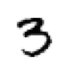

In [34]:
a3 = stacked3s[1]
show_image(a3)

is this a 3 or 7?

In [35]:
tensor([2,3,-7]).abs()

tensor([2, 3, 7])

In [36]:
#L1 norm
dist_to3_L1 = (a3-mean3).abs().mean()
dist_to3_L2 = ((a3-mean3)**2).mean().sqrt()
dist_to3_L1, dist_to3_L2

(tensor(0.1452), tensor(0.2624))

In [37]:
dist_to7_L1 = (a3-mean7).abs().mean()
dist_to7_L2 = ((a3-mean7)**2).mean().sqrt()
dist_to7_L1, dist_to7_L2

(tensor(0.1696), tensor(0.3184))

In [38]:
# L1 / L2 as loss functions in pytorch
# import torch.nn.functional as F
torch.nn.functional.l1_loss(a3.float(), mean7.float())

tensor(0.1696)

In [39]:
torch.nn.functional.mse_loss(a3.float(), mean7).sqrt()

tensor(0.3184)

# Pytorch / Numpy tricks

In [40]:
# lists
dataLists = [[1,2,3,4], [2,3,4,5]]
arr = np.array(dataLists)
tns = torch.tensor(dataLists)

In [41]:
arr

array([[1, 2, 3, 4],
       [2, 3, 4, 5]])

In [42]:
tns

tensor([[1, 2, 3, 4],
        [2, 3, 4, 5]])

In [43]:
tns[1,-2:]+1

tensor([5, 6])

In [44]:
#valid
valid3Tens = torch.stack([tensor(Image.open(x)) for x in (path/'valid/3').ls()])
valid3Tens = valid3Tens.float()/255

valid7Tens = torch.stack([tensor(Image.open(x)) for x in (path/'valid/7').ls()])
valid7Tens = valid7Tens.float()/255

In [45]:
valid3Tens.shape, valid7Tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [46]:
def distance(a,b):
  return (a-b).abs().mean((-1,-2))
# -1,-2 - średnia liczona dla których osi, bo są trzy. 
# The last 2 axes are horizontal and vertical dimensions of an image

In [47]:
distance(a3, mean3), distance(a3, mean7)

(tensor(0.1452), tensor(0.1696))

In [48]:
def rmseDistance(a,b):
  return ((a-b)**2).mean().sqrt()

In [49]:
rmseDistance(a3, mean3), rmseDistance(a3, mean7)

(tensor(0.2624), tensor(0.3184))

# Broadcoasting

In [50]:
valid3Distances = distance(valid3Tens, mean3)
valid3Distances, valid3Distances.shape

(tensor([0.1124, 0.1530, 0.1230,  ..., 0.1239, 0.1573, 0.1134]),
 torch.Size([1010]))

In [51]:
def is3(x):
  return rmseDistance(x,mean3) < rmseDistance(x,mean7)

In [52]:
is3(a3)

tensor(True)

In [53]:
# a jako liczba
is3(a3).float()

tensor(1.)

In [54]:
# Ile 3 i 7 z valid spełni warunek

accuracy3s = is3(valid3Tens).float().mean()
accuracy7s = (1-is3(valid7Tens).float())

# ile trójek jest bardziej podobna do 3 niż do 7 wg tego podejścia
# oraz ile 7 nie jest bardziej podobna do 3 niż do 7 (czyli jest 7)

accuracy3s, accuracy7s, (accuracy3s + accuracy7s)/2

(tensor(1.), tensor(1.), tensor(1.))

In [55]:
# no to dupa, na kursie było znacznie gorzej :(, nie było 100%

# Gradient descent

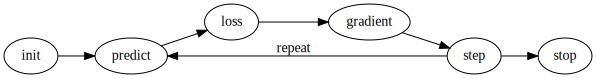

In [56]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init -> predict -> loss -> gradient -> step -> stop step -> predict[label = repeat]
''')

In [57]:
def f (x):
  return x**2

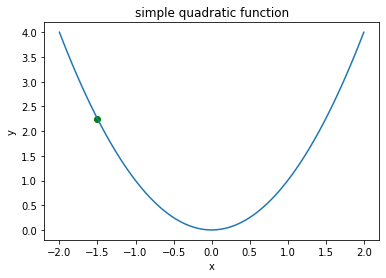

In [58]:
plot_function(f, 'x', 'y', title='simple quadratic function')
plt.scatter(-1.5, f(-1.5), color = 'green')

In [59]:
# method: .requires_grad_():
#   we want to calculate gradient with respect to that variable at that value; tagging the value
xt = tensor(3.).requires_grad_()

In [60]:
xt

tensor(3., requires_grad=True)

In [61]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [62]:
yt.backward()

In [63]:
xt.grad

tensor(6.)

In [64]:
# a teraz dla vectora:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [65]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [66]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [67]:
# speed of roller coaster as it went over the top of a hump
time = torch.arange(20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

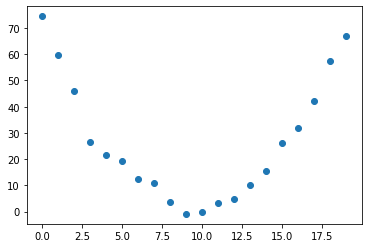

In [68]:
speed = torch.randn(20)*3+.75*(time-9.5)**2+1
plt.scatter(time, speed);
# randn - random noise
# reszta: zmyślona funkcja na obliczenie prędkości 

In [69]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

# to ta funkcja na obliczenie prędkości
# znajdź najlepsze a,b,c dla tej quadratic function

In [70]:
# loss function, for continuous data common: mse
def mse (preds, targets): return ((preds-targets)**2).mean()

In [71]:
# 1. Initialize the parameters
# + tell Pytorch, we want to track their gradients
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

#2 calculate predictions
preds = f(time, params)

In [72]:
def show_preds(preds, ax=None):
  if ax == None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color = 'red')
  ax.set_ylim(-300,100)

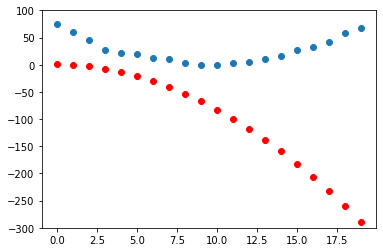

In [73]:
show_preds(preds)

In [74]:
# 3. calculate loss
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [75]:
# 4. calculate the gradients
loss.backward()
params.grad

tensor([-53195.8594,  -3419.7146,   -253.8908])

In [76]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [77]:
# 5. Update the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [78]:
#check:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5366, grad_fn=<MeanBackward0>)

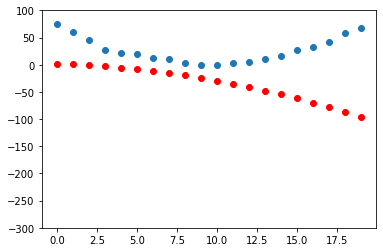

In [79]:
show_preds(preds)

In [80]:
# repeat this:

def apply_step(params, prn = True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None

  if prn: print(loss.item())
  return preds

In [81]:
# 6. Repeat
for i in range(10): apply_step(params)

5435.53662109375
1577.4495849609375
847.3780517578125
709.22265625
683.0757446289062
678.12451171875
677.1839599609375
677.0025024414062
676.96435546875
676.9537353515625


In [82]:
params = orig_params.detach().requires_grad_()

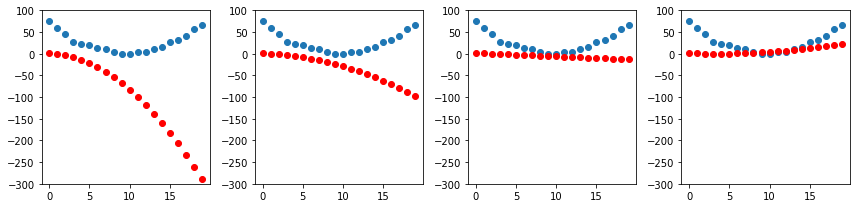

In [83]:
# _,axs = plt.subplots(1,4,figsize=(12,3))
_, axs = plt.subplots(1,4, figsize = (12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## Summarizing GD


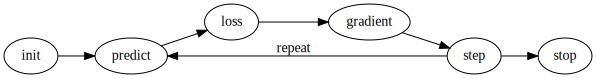

In [84]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

# MNIST again

In [85]:
train_x = torch.cat([stacked3s, stacked7s]).view(-1, 28*28)

In [86]:
train_x.shape

torch.Size([12396, 784])

In [87]:
train_y = tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)
# chyba: '1' jak jest 3, 0 jak jest 7, czyli wartościvalid
train_y.shape

torch.Size([12396, 1])

In [88]:
dataset = list(zip(train_x, train_y))
x,y = dataset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [89]:
valid_x = torch.cat([valid3Tens, valid7Tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid3Tens) + [0]*len(valid7Tens)).unsqueeze(1)

In [90]:
validDataset = list(zip(valid_x, valid_y))

### initialize weights

In [91]:
def initParams (size, std = 1.):
  return (torch.randn(size)*std).requires_grad_()

weights = initParams(28*28,1)

In [92]:
# problem: jak pixel value = 0, to parameter * weight też będzie zero. Duuuużo zer.

In [93]:
bias = initParams(1)

In [94]:
# prediction for 1st image:
(train_x[0]*weights.T).sum() + bias
# sum: bo symulując matrix multiplication: tam się wynik mnożenia sumuje, zostaje 1 liczba

tensor([10.3505], grad_fn=<AddBackward0>)

In [95]:
# predictions:

def linear1(xb):
  return xb @ weights + bias
  # a tu juz nie trzeba sum(), bo jest matrix mult.

preds = linear1(train_x)
preds

tensor([10.3505,  8.2057, 19.1971,  ...,  8.0449,  4.6226, 21.6269], grad_fn=<AddBackward0>)

In [96]:
preds[-1]

tensor(21.6269, grad_fn=<SelectBackward>)

In [97]:
# dla przypomnienia: train_y to jedynki i zera
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

check the accuracy ;) czyli ile jest true czyli trafnych

In [98]:
corrects.float().mean()

tensor(0.4946)

In [99]:
corrects.float().mean().item()

0.49464210867881775

o co chodzi z tym true:

In [100]:
preds>0.0

tensor([True, True, True,  ..., True, True, True])

In [101]:
(preds>0.0).float()

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [102]:
# coś się pogubiłem, bo:
# 6 tys. trójek: ma label: '1', siódemki mają label "0"
# aaa.... czyli ma takie weights wyliczyć (łącznie z ujemnymi), żeby siódemki miały wynik matmul 0 lub mniej 
# Przy randomowych (chyba wszystkie były dodatnie?) wszystkie matmuls były dodatnie, więc do dupy.
# I to jest tylko do tego task: binary classification
# w sumie ok

# Loss function in general

In [103]:
prds = tensor([.9, .4, .2])
trgts = tensor([1,0,1])

In [104]:
def mnistLoss(predictions, targets):
  return torch.where(targets == 1, 1-predictions, predictions).mean()
  # oblicza error, jeśli target = 1 to error = 1-prediction, jeśli target = 0 to error = prediction

In [105]:
torch.where(trgts == 1, 1 - prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [106]:
mnistLoss(prds, trgts)
# (funkcja wylicza z tego mean)

tensor(0.4333)

#Sigmoid

In [107]:
def sigmoid(x): return 1/(1+torch.exp(-x))

In [108]:
#lub: 
torch.sigmoid(tensor([5.]))

tensor([0.9933])

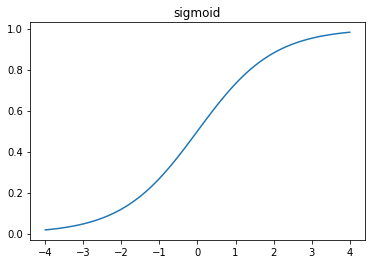

In [109]:
plot_function(torch.sigmoid, title = 'sigmoid', min = -4., max = 4)

In [110]:
#update, predictions are now always between 0 and 1:
def mnistLoss (predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [111]:
tensor([5.9]).sigmoid()

tensor([0.9973])

In [112]:
torch.arange(9).reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

### mini batches

In [113]:
coll = range(15)
# Dataloader: shuffles & collates / zestawia/ dane w mini batches
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [114]:
#test
list(enumerate('abcd'))

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd')]

In [115]:
#test
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [116]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [117]:
dl = DataLoader(ds, batch_size=5, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

# ALL TOGETHGER

In [118]:
# initialize parameters
weights = initParams((28*28, 1))
bias = initParams(1)

In [119]:
# create dataLoader from Dataset:
dl = DataLoader(dataset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [120]:
?first

In [121]:
valid_dl = DataLoader(validDataset, batch_size=256)

In [122]:
#create mini batches, size 4 for testing
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [123]:
preds = linear1(batch)
preds

tensor([[ -4.2755],
        [-14.0871],
        [ -6.0096],
        [  2.7045]], grad_fn=<AddBackward0>)

In [124]:
loss = mnistLoss(preds, train_y[:4])
loss

tensor(0.7616, grad_fn=<MeanBackward0>)

In [125]:
# calculate gradient
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0017), tensor([-0.0187]))

In [126]:
# to samo, w funkcji:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnistLoss(preds, yb)
  #loss backward() adds the gradient of loss to any gradient stored
  loss.backward()

In [127]:
# test the function:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0034), tensor([-0.0374]))

In [128]:
# a teraz gradient = 0
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [129]:
weights[:3]

tensor([[-0.2206],
        [ 0.7118],
        [ 0.3416]], grad_fn=<SliceBackward>)

# method_
Methods in PyTorch whose names end in an underscore modify their objects in place.   
For instance, bias.zero_() sets all elements of the tensor bias to 0.

In [130]:
#update weights and bias based on gradient and learning rate
# + nie przenosić gradientu między batchami, dla każdego to samo ma być take derivative
def train_epoch(model, lr, params):
  for xb, yb in dl:
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [131]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [ True]])

In [132]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [133]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [134]:
#together:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [135]:
validate_epoch(linear1)

0.5263

In [136]:
# train for 1 epoch:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.5263

In [137]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end = ' ')

0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 0.5263 

coś się zjebało, poniżej skopiowane bezpośrednio i działa
któraś funkcja musi mieć feler

---



---



## Optimizer

`nn.Linear` does the same thing as our init_params and linear together.

In [138]:
linear_model = nn.Linear(28*28,1)

In [139]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [140]:
# create optimizer:
class BasicOptim:
  def __init__(self, params, lr):
    self.params = params
    self.lr = lr

  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr
      # parameter - gradient * learning rate
    
  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None

In [141]:
nn.Linear??

In [142]:
opt = BasicOptim(linear_model.parameters(), lr)

In [143]:
# training loop:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [144]:
validate_epoch(linear_model)#t

0.4606

In [145]:
# trainig loop:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [146]:
train_model(linear_model, 20)

0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 

In [147]:
# SGD class in fastai:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.6851 0.8691 0.9224 0.9409 0.9556 0.9629 0.9678 0.9683 0.9697 0.9707 0.9727 0.9727 0.9751 0.9761 0.9766 0.9771 0.9775 0.978 0.9795 

#fastai way
`Learner.fit`, which we can use instead of `train_model`
To create a Learner we first need to create a DataLoaders, by passing in our training and validation DataLoaders:

In [148]:
dls = DataLoaders(dl, valid_dl)

In [152]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [153]:
learn.fit(10, lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.635422,0.500849,0.495584,00:00
1,0.280738,0.308504,0.686948,00:00
2,0.112160,0.153578,0.860648,00:00
3,0.055155,0.095200,0.918057,00:00
4,0.033837,0.070011,0.940137,00:00
5,0.025293,0.056172,0.953876,00:00
6,0.021520,0.047704,0.962709,00:00
7,0.019624,0.042199,0.967615,00:00
8,0.018528,0.038400,0.968106,00:00
9,0.017810,0.035633,0.969087,00:00


In [155]:
learn.recorder.values

[(#3) [0.6354224681854248,0.500849187374115,0.4955838918685913],
 (#3) [0.2807382047176361,0.3085043132305145,0.6869480013847351],
 (#3) [0.11215972900390625,0.15357795357704163,0.8606476783752441],
 (#3) [0.05515504255890846,0.0951998382806778,0.9180569052696228],
 (#3) [0.03383665159344673,0.07001137733459473,0.9401373863220215],
 (#3) [0.025293011218309402,0.05617167428135872,0.9538763761520386],
 (#3) [0.02152046002447605,0.04770350456237793,0.9627085328102112],
 (#3) [0.01962403953075409,0.042199425399303436,0.9676153063774109],
 (#3) [0.018527846783399582,0.038399938493967056,0.9681059718132019],
 (#3) [0.01780979335308075,0.03563348203897476,0.9690873622894287]]

In [156]:
learn.model

Linear(in_features=784, out_features=1, bias=True)

# Nonlinearity

In [157]:
def simple_net(xb):
  res = xb @ w1 + b1
  print(res)
  # rectified linear unit, RELu, = replace any negative value with a zero  (F.relu)
  res = res.max(tensor(0.0))
  print(res)
  res = res @ w2 + b2
  return res


In [165]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params(30,1)
b2 = init_params(1)

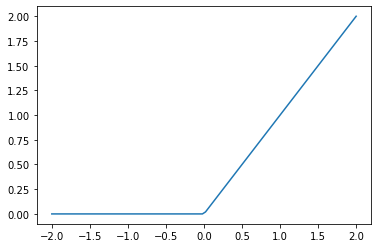

In [166]:
plot_function(F.relu)

In [160]:
# nn.Sequential creates a module that will call each of the listed layers or functions in turn.
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [161]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [162]:
learn.fit(40,.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.295326,0.412019,0.505397,00:00
1,0.140174,0.215663,0.821884,00:00
2,0.078845,0.107331,0.921982,00:00
3,0.052558,0.072781,0.945535,00:00
4,0.040250,0.057220,0.960255,00:00
5,0.033854,0.048607,0.965162,00:00
6,0.030120,0.043222,0.966634,00:00
7,0.027677,0.039555,0.968597,00:00
8,0.025918,0.036895,0.969578,00:00
9,0.024558,0.034872,0.972031,00:00


In [180]:
learn.recorder.values[:5]
# chyba: train loss, valid loss, accuracy

[(#3) [0.2953261733055115,0.41201910376548767,0.5053974390029907],
 (#3) [0.14017364382743835,0.2156628966331482,0.8218842148780823],
 (#3) [0.07884465903043747,0.10733084380626678,0.9219823479652405],
 (#3) [0.052557531744241714,0.07278069108724594,0.9455348253250122],
 (#3) [0.040249619632959366,0.0572204664349556,0.9602551460266113]]

In [167]:
L(learn.recorder.values).itemgot(2) # (2) czyli 3 parametr, to chyba jest accuracy

(#40) [0.5053974390029907,0.8218842148780823,0.9219823479652405,0.9455348253250122,0.9602551460266113,0.965161919593811,0.9666339755058289,0.9685966372489929,0.9695780277252197,0.9720314145088196...]

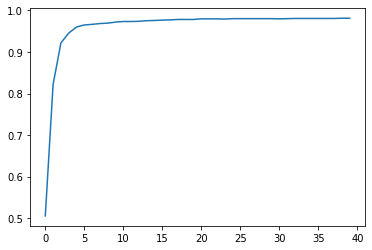

In [168]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [169]:
learn.recorder.values[-1][2]

0.981354296207428

In [170]:
# retrieve parameters z danej epoch

In [171]:
learn.model

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [172]:
learn.model[2]

Linear(in_features=30, out_features=1, bias=True)

In [173]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [181]:
m[0]

Linear(in_features=784, out_features=30, bias=True)

In [176]:
m[0].parameters()

<generator object Module.parameters at 0x7fb403b9d410>

In [182]:
w, b = m[0].parameters()

In [183]:
w.shape, b.shape

(torch.Size([30, 784]), torch.Size([30]))

In [177]:
b

Parameter containing:
tensor([0.2542], requires_grad=True)

In [179]:
w

Parameter containing:
tensor([[ 1.1249e-03,  2.6239e-02,  2.2575e-02,  3.5275e-02, -1.0235e-02,  1.4132e-02,  2.4938e-02, -2.4243e-02,  7.0950e-03, -7.9912e-03,  2.2958e-02, -1.6040e-02,  2.5049e-03,  2.1368e-02,
         -3.2718e-02, -3.0156e-02, -1.8292e-02,  2.2908e-02,  2.3947e-02, -2.4392e-02,  6.8103e-03, -1.8924e-02, -1.6577e-02,  3.0801e-02,  1.7250e-02, -9.7672e-03,  5.2572e-03,  6.9199e-03,
          8.3658e-03, -1.2224e-02, -2.1032e-02,  2.3645e-02,  4.7990e-03,  1.4948e-02, -1.3526e-02,  1.7299e-02,  2.5992e-02,  2.1720e-02,  9.7106e-03,  3.5139e-02, -7.8108e-05,  7.6035e-03,
          3.3933e-02,  3.4711e-02, -1.5079e-02,  3.2172e-02,  1.3181e-02, -3.9978e-03,  3.1184e-02, -1.8501e-02,  2.3205e-02,  3.5391e-02, -2.4632e-02, -2.1075e-02, -3.5390e-02, -6.4272e-03,
         -3.2436e-02, -1.1961e-02,  1.0843e-02,  2.5246e-02,  1.9894e-02,  1.9824e-02,  1.4817e-02, -2.2151e-02, -2.8357e-02,  1.4805e-03,  3.3914e-02,  2.0109e-03, -3.0718e-03, -2.3652e-02,
         -1.6833e-02, -

In [185]:
#reshape
w.view(-1, 28*28)

tensor([[-0.0127, -0.0219, -0.0310,  ...,  0.0079,  0.0262,  0.0246],
        [ 0.0062, -0.0342,  0.0073,  ...,  0.0025, -0.0167,  0.0140],
        [-0.0192, -0.0148,  0.0134,  ...,  0.0002, -0.0285,  0.0206],
        ...,
        [-0.0035, -0.0329, -0.0157,  ...,  0.0212, -0.0067, -0.0112],
        [-0.0198,  0.0039,  0.0168,  ..., -0.0313,  0.0276, -0.0021],
        [ 0.0143,  0.0247,  0.0283,  ...,  0.0005, -0.0310,  0.0251]], grad_fn=<ViewBackward>)

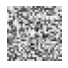

In [187]:
show_image(w[0].view(28,28))

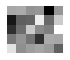

In [193]:
w,b = m[2].parameters()
show_image(w[0].view(5,6))

# fastai way:

In [196]:
dls = ImageDataLoaders.from_folder(path)

In [197]:
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.113646,0.013440,0.996565,03:07


In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
print(path.ls())
print((path/'train').ls())

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

In [ ]:
show_image(three_tensors[111]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

In [ ]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

In [ ]:
a_3 = stacked_threes[1]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

In [ ]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

In [ ]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

In [ ]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

In [ ]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

In [ ]:
dset = list(zip(train_x,train_y))

In [ ]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [164]:
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

In [ ]:
corrects = (preds>0.0).float() == train_y
corrects

In [ ]:
corrects.float().mean().item()

In [151]:
def sigmoid(x): 
  return 1/(1+torch.exp(-x))

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()    

In [ ]:
dl = DataLoader(dset, batch_size=256)

In [ ]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()



In [ ]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [ ]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

In [ ]:
linear1

In [ ]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), ' ')

In [ ]:
a = 'abcd'; b = '1234'
list(zip(list(a), list(b)))

In [ ]:
list(enumerate('abcd'))

# code playground

In [ ]:
Image?